<h1 style="color:#7FC8A9 ; text-align:center;">Bitcoin Price Analysis</h1>

<h6>@author: annice</h6>
<h6>Fall 2021</h6>
<h6>Texas A&M University</h6>

<h6>Short Description:</h6><br>
Moving averages are commonly used for trading cryptocurrency. In the folowing program, we retrieve Bitcoin price over time from Yahoo and analyze when we should buy bitcoin or not based on the ratio of their long term and short term moving (rolling) averages.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web

<h6>color scheme</h6>

In [97]:
#Define color scheme below. 
color_1 = "#F1ECC3"
color_2 = "#C9D8B6"
color_3= "#57837B"
color_4 = "#515E63"

<h6>Rolling Average Explanation:</h6>

<p style="color:#515E63; ">Example: We have data points {0, 1, 1, 2, 1, 4, 1, 1, 1, 2}, to find the rolling average with a window of 5 we take the first five numbers and find the average. The first five numbers are {0, 1, 1, 2, 1}. The average for the first five numbers would be 1. Then we move the window one number to the right so now our window contains {1, 1, 2, 1, 4} which has an average of 1.8. We keep moving the window to the right until we reach {4, 1, 1, 1, 2} and we can no longer move the window to the right. Therefore the rolling average for the following set of numbers is 1, 1.8, 1.8, 1.8, 1.6, 1.8.</p>

In [71]:
#Set from when we want to retrieve data. In this case after september 2019
start = datetime.datetime(2019, 9, 1)
#All the way up to August 2021
end= datetime.datetime(2021,8,1)
#get the data from Yahoo
bitcoin_data = web.get_data_yahoo(['BTC-USD'], start=start, end=end)['Close']
#show the first five rows 
bitcoin_data.head(5)

Symbols,BTC-USD
Date,
2019-08-31,9757.970703
2019-09-01,10346.760742
2019-09-02,10623.540039
2019-09-03,10594.493164
2019-09-04,10575.533203


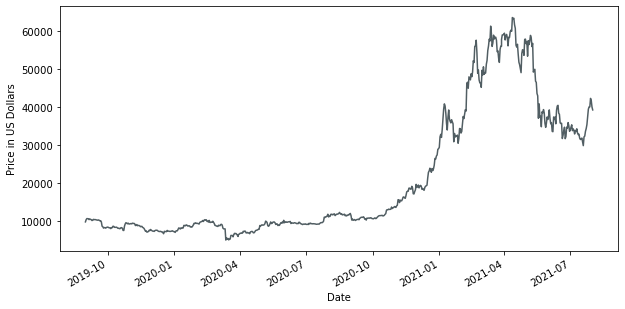

In [86]:
#plot bitcoin price over time
bitcoin_data['BTC-USD'].plot(figsize = (10, 5), color=color_4)
plt.ylabel("Price in US Dollars")
plt.show()

In [73]:
#For now let's stick to 20 days for short period moving average and 50 for long period moving average
bitcoin_data['BTC-USD-Rolling-short'] = bitcoin_data['BTC-USD'].rolling(window=20, min_periods=1).mean()
bitcoin_data['BTC-USD-Rolling-long'] = bitcoin_data['BTC-USD'].rolling(window=50, min_periods=1).mean()
bitcoin_data.head(5)

Symbols,BTC-USD,BTC-USD-Rolling-short,BTC-USD-Rolling-long
Date,,,
2019-08-31,9757.970703,9757.970703,9757.970703
2019-09-01,10346.760742,10052.365723,10052.365723
2019-09-02,10623.540039,10242.757161,10242.757161
2019-09-03,10594.493164,10330.691162,10330.691162
2019-09-04,10575.533203,10379.659570,10379.659570


In [74]:
#Define a new column named "drop". Check where the short period rolling average exceeds 
#long period moving average and the value of the new column to 1 otherwise set it to 0.
bitcoin_data['drop'] = np.where(bitcoin_data['BTC-USD-Rolling-short'] > bitcoin_data['BTC-USD-Rolling-long'], 1.0, 0.0)

In [88]:
'''
    Define a new column called "crossover" and subtract subsequent values in the "drop" column.
Note: This means that if at two points in the "drop" column we have both points either 0 or 1, the value at "crossover"
will be set to 0. 

 If they differ and 
     I) the initial row is 1 and the next row is 0 then the value at "drop" will be -1 meaning the short time moving average 
     is falling behind the long term moving average and it is time to SELL Bitcoin.
     II) Meanwhile if the value in column "drop" is changing from 0 to 1 then that means the short term moving average is 
     rising above long term moving average and it is time to buy Bitcoin.
'''
bitcoin_data['crossover'] = bitcoin_data['drop'].diff()

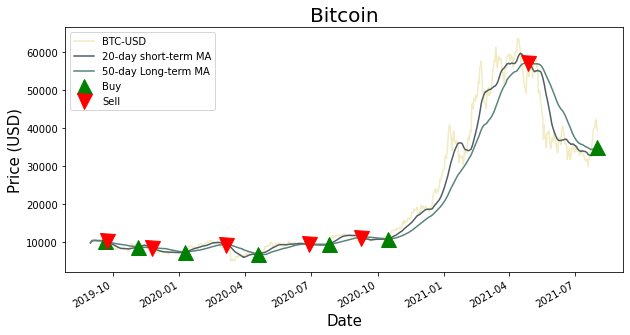

In [98]:
plt.figure(figsize = (10,5))
# plot close price, short-term and long-term moving averages 
bitcoin_data['BTC-USD'].plot(color = color_1, label= 'BTC-USD') 
bitcoin_data['BTC-USD-Rolling-short'].plot(color = color_4, label = '20-day short-term MA') 
bitcoin_data['BTC-USD-Rolling-long'].plot(color = color_3, label = '50-day Long-term MA')

plt.plot(bitcoin_data[bitcoin_data['crossover'] == 1].index, 
         bitcoin_data['BTC-USD-Rolling-short'][bitcoin_data['crossover'] == 1], 
         '^', markersize = 15, color = 'g', label = 'Buy')

plt.plot(bitcoin_data[bitcoin_data['crossover'] == -1].index, 
         bitcoin_data['BTC-USD-Rolling-short'][bitcoin_data['crossover'] == -1], 
         'v', markersize = 15, color = 'r', label = 'Sell')
plt.ylabel('Price (USD)', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Bitcoin', fontsize = 20)
plt.legend()
plt.show()